<a href="https://colab.research.google.com/github/AMEERKOTTA/Deep-Learning-and-Artificial-Intelligence-Tensorflow-2.0/blob/main/Chapter%2004%20%3A%20Convolutional%20Neural%20Networks/05_cifar_10_classification_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CIFAR-10 CNN MODEL**

IMPORT LIBRARIES

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

LOAD THE DATA

In [2]:
cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
## standardize the training and testing data.
train_images, test_images = train_images / 255, test_images / 255
## flatten the training labels and testing labels.
train_labels, test_labels = train_labels.flatten(), test_labels.flatten()

print("Training Images Shape :--", train_images.shape)
print("Training Labels Shape :--", train_labels.shape)
print("Testing Images Shape :--", test_images.shape)
print("Testing Labels Shape :--", test_labels.shape)

170498071/170498071 [==============================] - 3s 0us/step
Training Images Shape :-- (50000, 32, 32, 3)
Training Labels Shape :-- (50000,)
Testing Images Shape :-- (10000, 32, 32, 3)
Testing Labels Shape :-- (10000,)


CHECK FOR THE NUMBER OF CLASSES

In [3]:
k = len(set(train_labels))
print("Number of Classes :--", k)

Number of Classes :-- 10


BUILD THE MODEL

In [4]:
from keras.api._v2.keras import activations
## using the functional API
i = Input(shape = train_images[0].shape) 
x = Conv2D(32, (3,3), strides = 2, activation = "relu")(i)
x = Conv2D(64, (3,3), strides = 2, activation = "relu")(x)
x = Conv2D(128, (3,3), strides = 2, activation = "relu")(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation = "relu")(x)
x = Dropout(0.2)(x)
x = Dense(k, activation = "softmax")(x)

model = Model(i, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 15, 15, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dropout (Dropout)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 512)               590336

COMPILE THE MODEL

In [5]:
## compile the model
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

TRAIN THE MODEL

In [6]:
## fit the model
r = model.fit(train_images, train_labels,
              validation_data = (test_images, test_labels),
              epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 20s 6ms/step - loss: 1.5200 - accuracy: 0.4459 - val_loss: 1.2678 - val_accuracy: 0.5394
Epoch 2/50
1563/1563 [==============================] - 9s 5ms/step - loss: 1.1786 - accuracy: 0.5795 - val_loss: 1.0572 - val_accuracy: 0.6248
Epoch 3/50
1563/1563 [==============================] - 9s 5ms/step - loss: 1.0148 - accuracy: 0.6375 - val_loss: 0.9760 - val_accuracy: 0.6570
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8910 - accuracy: 0.6843 - val_loss: 0.9156 - val_accuracy: 0.6754
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8014 - accuracy: 0.7148 - val_loss: 0.8663 - val_accuracy: 0.6947
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7137 - accuracy: 0.7462 - val_loss: 0.8794 - val_accuracy: 0.6952
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6430 - accuracy: 0.7693 - val_loss: 0.8627 - val_accuracy

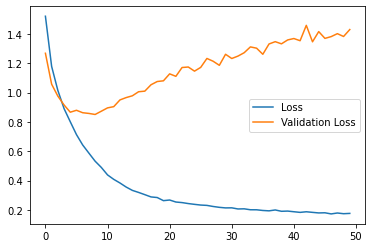

In [8]:
## plotting the loss and accuracy graphs
plt.plot(r.history["loss"], label = "Loss")
plt.plot(r.history["val_loss"], label = "Validation Loss")
plt.legend();

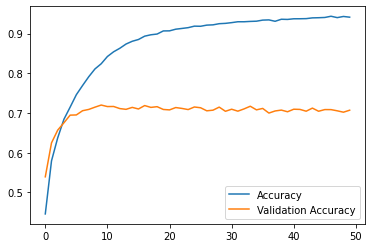

In [9]:
plt.plot(r.history["accuracy"], label = "Accuracy")
plt.plot(r.history["val_accuracy"], label = "Validation Accuracy")
plt.legend();

Here, the model is Overfitting.

+ Even though the training loss is Decreasing with respect to epochs.
+ The Validation loss is Increasing with respect to epochs.
+ Similarly, Training accuracy is high and Validation accurcay is low.



> *Overfitting occur when the model is generalizes well on the training set. But fails to generalizes well on the test set.*



***